In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('roman_hlwas_medium.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 47521 pickle(s) in /data/bwedig/mejiro/roman_hlwas_medium/03


In [4]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

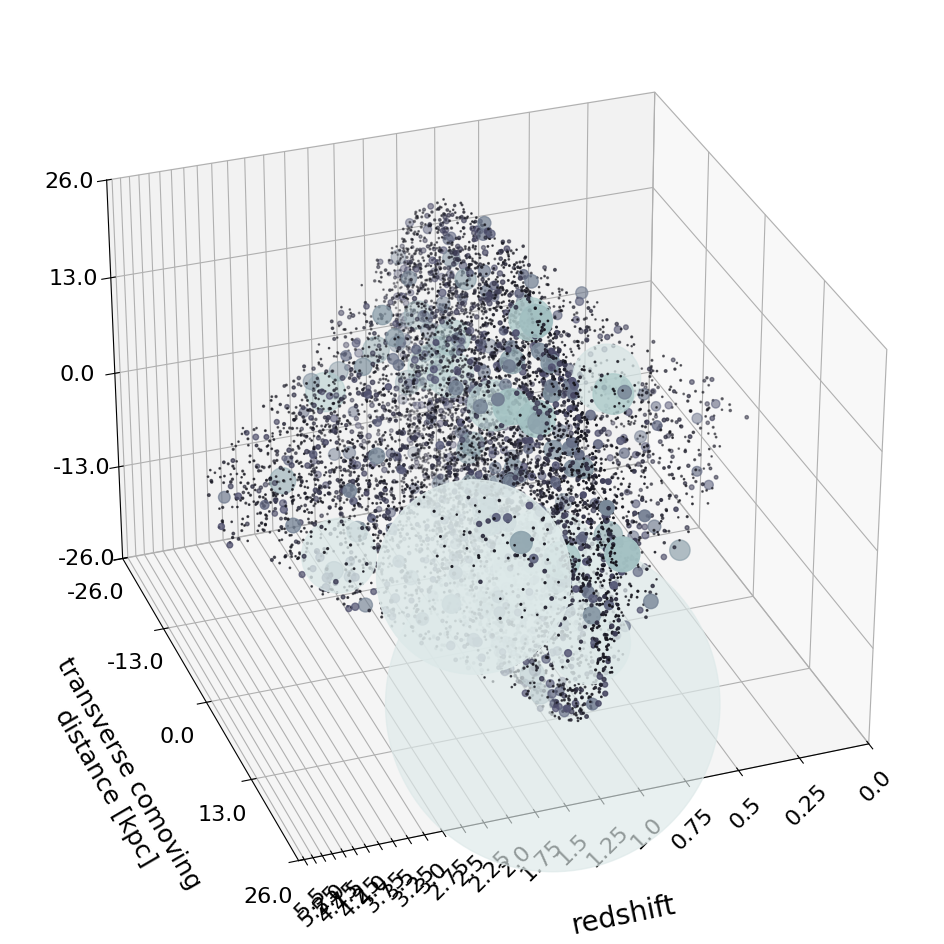

In [5]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

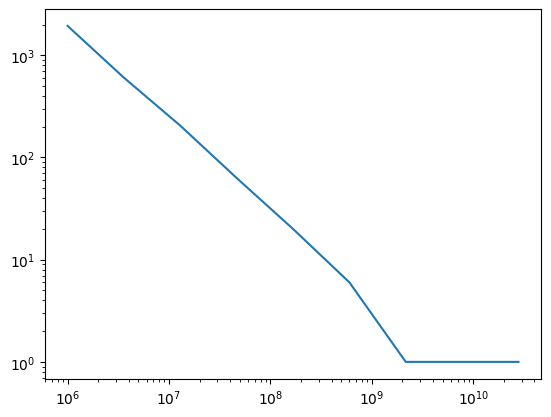

In [6]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.show()

In [7]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 7.64e+10 Msun

{'_alphaRs': 0.053580374920104167,
 '_args': {'gamma_inner': 2.0, 'gamma_outer': 5.0, 'x_match': 'c'},
 '_c': 4.065752167063075,
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f6325bca650>,
 '_lenstronomy_args': [{'Rs': 0.5135185174,
                        'alpha_Rs': 0.0535803749,
                        'center_x': 0.7052,
                        'center_y': -1.2442,
                        'gamma_inner': 2.0,
                        'gamma_outer': 5.0}],
 '_nfw_halo': <pyHalo.Halos.HaloModels.TNFW.TNFWSubhalo object at 0x7f6325b4c3a0>,
 '_nfw_params': [16262152.48775893, 6.391293658832191, 25.98541604373347],
 '_prof': <lenstronomy.LensModel.Profiles.pseudo_double_powerlaw.PseudoDoublePowerlaw object at 0x7f6325b4ca90>,
 '_profile_args': (4.065752167063075, 2.0, 5.0),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_z_infall': 4.0641449515326995,
 '_zeval': 4.0641449515326995,
 'fixed_position': False,
 'is_subhalo': True,
 '